In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

YR   = 365.2563

In [2]:
name_file1 = "3_bodies"
name = name_file1  + ".txt"

try:
    data = np.genfromtxt(name)
except ValueError as err:
    try:
        data = np.genfromtxt(name, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data.shape)
N = data.shape[0]

df = pd.DataFrame(data)
df = df.rename(columns=dict(
    zip(df.columns,
     ["s0", "o0",
     "a1", "K1", "s1", "o1", "H1",
     "a2", "K2", "s2", "o2", "H2",
     "n1", "n2",
     "t", "dt", "dt_adap"])
    ))
df.t       /= YR
df.dt      /= YR
df.dt_adap /= YR
df["e1"] = np.sqrt(df.K1**2 + df.H1**2)
df["e2"] = np.sqrt(df.K2**2 + df.H2**2)
df["w1"] = np.arctan2(df.H1, df.K1)
df["w2"] = np.arctan2(df.H2, df.K2)
display(df)

Shape: (5000, 17)


,s0,o0,a1,K1,s1,o1,H1,a2,K2,s2,...,H2,n1,n2,t,dt,dt_adap,e1,e2,w1,w2
0,0.224399,0.436332,0.050000,0.100000,628.318531,1.396263,0.000000e+00,0.200000,-0.100000,628.318531,...,1.224647e-17,1.538605,0.192417,0.000000e+00,0.000000e+00,2.737804e-07,0.100000,0.100000,0.000000e+00,3.141593
1,0.224399,0.436332,0.050000,0.100000,628.318391,1.396263,2.669696e-08,0.200000,-0.100000,628.318531,...,-7.322662e-11,1.538605,0.192417,3.109414e-05,3.109414e-05,7.647067e-05,0.100000,0.100000,2.669696e-07,-3.141593
2,0.224399,0.436332,0.050000,0.100000,628.318321,1.396263,4.015893e-08,0.200000,-0.100000,628.318531,...,-1.101512e-10,1.538605,0.192417,4.677339e-05,1.567925e-05,4.233907e-05,0.100000,0.100000,4.015893e-07,-3.141593
3,0.224399,0.436332,0.050000,0.100000,628.318250,1.396263,5.369713e-08,0.200000,-0.100000,628.318531,...,-1.472849e-10,1.538605,0.192417,6.254143e-05,1.576804e-05,7.884019e-05,0.100000,0.100000,5.369713e-07,-3.141593
4,0.224399,0.436332,0.050000,0.100000,628.318179,1.396263,6.731199e-08,0.200000,-0.100000,628.318531,...,-1.846289e-10,1.538605,0.192417,7.839876e-05,1.585733e-05,7.928663e-05,0.100000,0.100000,6.731199e-07,-3.141593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.224400,0.436330,0.039435,0.007079,2.202824,0.000000,2.043186e-02,0.202417,0.033084,0.200574,...,9.548824e-02,2.196661,0.188982,4.888333e+09,2.752497e+07,4.379675e+01,0.021624,0.101057,1.237252e+00,1.237271
4996,0.224400,0.436330,0.039344,-0.017616,2.210420,0.000000,-1.240380e-02,0.202417,-0.082613,0.200570,...,-5.817102e-02,2.204281,0.188982,4.916013e+09,2.768083e+07,4.375193e+01,0.021545,0.101039,-2.528115e+00,-2.528096
4997,0.224400,0.436330,0.039252,-0.004443,2.218173,0.000000,2.100041e-02,0.202417,-0.020912,0.200566,...,9.883197e-02,2.212057,0.188982,4.943851e+09,2.783758e+07,4.378895e+01,0.021465,0.101020,1.779293e+00,1.779312
4998,0.224400,0.436330,0.039158,-0.000420,2.226088,0.000000,2.138010e-02,0.202417,-0.001986,0.200562,...,1.009817e-01,2.219997,0.188982,4.971846e+09,2.799521e+07,6.088682e+00,0.021384,0.101001,1.590438e+00,1.590458


In [3]:
name_file2 = "2_bodies"
name2 = name_file2 + ".txt"
try:
    data2 = np.genfromtxt(name2)
except ValueError as err:
    try:
        data2 = np.genfromtxt(name2, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data2.shape)
N2 = data2.shape[0]

df2 = pd.DataFrame(data2)
df2 = df2.rename(columns=dict(
    zip(df2.columns,
     ["s0", "o0",
     "a1", "K1", "s1", "o1", "H1",
     "a2", "K2", "s2", "o2", "H2",
     "n1", "n2",
     "t", "dt", "dt_adap"])
    ))
df2.t       /= YR
df2.dt      /= YR
df2.dt_adap /= YR
df2["e1"] = np.sqrt(df2.K1**2 + df2.H1**2)
df2["e2"] = np.sqrt(df2.K2**2 + df2.H2**2)
df2["w1"] = np.arctan2(df2.H1, df2.K1)
df2["w2"] = np.arctan2(df2.H2, df2.K2)
display(df2)

Shape: (5000, 17)


,s0,o0,a1,K1,s1,o1,H1,a2,K2,s2,...,H2,n1,n2,t,dt,dt_adap,e1,e2,w1,w2
0,0.224399,0.436332,0.050000,1.000000e-01,628.318531,1.396263,0.000000e+00,0.2,-0.1,628.318531,...,1.224647e-17,1.538605,0.192417,0.000000e+00,0.000000e+00,2.737804e-07,1.000000e-01,0.1,0.000000e+00,3.141593
1,0.224399,0.436332,0.050000,1.000000e-01,628.318391,1.396263,1.034906e-09,0.2,-0.1,628.318531,...,1.224647e-17,1.538605,0.192417,3.109414e-05,3.109414e-05,7.467618e-05,1.000000e-01,0.1,1.034906e-08,3.141593
2,0.224399,0.436332,0.050000,1.000000e-01,628.318321,1.396263,1.556758e-09,0.2,-0.1,628.318531,...,1.224647e-17,1.538605,0.192417,4.677339e-05,1.567925e-05,3.962724e-05,1.000000e-01,0.1,1.556758e-08,3.141593
3,0.224399,0.436332,0.050000,1.000000e-01,628.318250,1.396263,2.081565e-09,0.2,-0.1,628.318531,...,1.224647e-17,1.538605,0.192417,6.254143e-05,1.576804e-05,3.986575e-05,1.000000e-01,0.1,2.081565e-08,3.141593
4,0.224399,0.436332,0.050000,1.000000e-01,628.318179,1.396263,2.609344e-09,0.2,-0.1,628.318531,...,1.224647e-17,1.538605,0.192417,7.839876e-05,1.585733e-05,4.124012e-05,1.000000e-01,0.1,2.609344e-08,3.141593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.224400,0.436332,0.049478,5.715205e-32,1.563039,0.000000,-2.811331e-33,0.2,-0.1,628.318531,...,1.224647e-17,1.563039,0.192417,4.888333e+09,2.752497e+07,1.887824e+02,5.722115e-32,0.1,-4.915077e-02,3.141593
4996,0.224400,0.436332,0.049477,-1.350681e-32,1.563045,0.000000,3.609912e-32,0.2,-0.1,628.318531,...,1.224647e-17,1.563045,0.192417,4.916013e+09,2.768083e+07,4.054801e+02,3.854323e-32,0.1,1.928829e+00,3.141593
4997,0.224400,0.436332,0.049477,1.436119e-32,1.563052,0.000000,2.155840e-32,0.2,-0.1,628.318531,...,1.224647e-17,1.563052,0.192417,4.943851e+09,2.783758e+07,3.706526e+02,2.590383e-32,0.1,9.831497e-01,3.141593
4998,0.224400,0.436332,0.049477,-1.471842e-32,1.563058,0.000000,-9.224075e-33,0.2,-0.1,628.318531,...,1.224647e-17,1.563058,0.192417,4.971846e+09,2.799521e+07,3.858498e+02,1.736996e-32,0.1,-2.581770e+00,3.141593


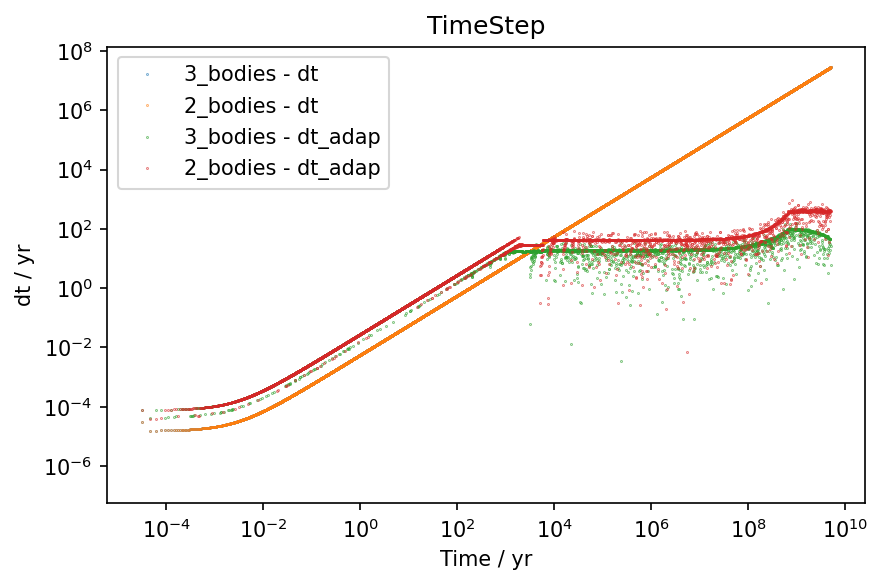

In [4]:
plt.figure(dpi=150)
plt.title("TimeStep")
plt.plot(df.t, df.dt, '.', ms=0.5, label=name_file1 + " - dt")
plt.plot(df2.t, df2.dt, '.', ms=0.5, label=name_file2 + " - dt")
plt.plot(df.t, df.dt_adap, '.', ms=0.5, label=name_file1 + " - dt_adap")
plt.plot(df2.t, df2.dt_adap, '.', ms=0.5, label=name_file2 + " - dt_adap")
plt.xlabel("Time / yr")
plt.ylabel("dt / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.show()

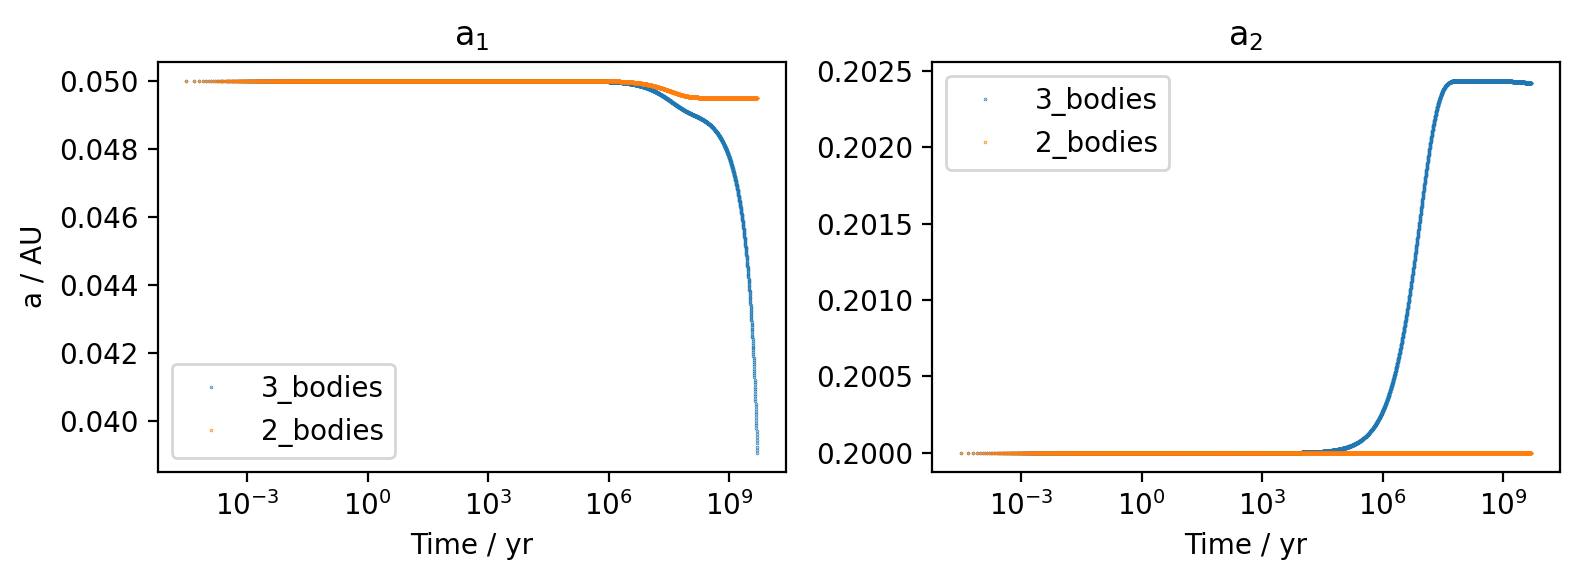

In [5]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("a$_1$")
plt.plot(df.t, df.a1, '.', ms=0.5,  label=name_file1)
plt.plot(df2.t, df2.a1, '.', ms=0.5,  label=name_file2)
plt.xlabel("Time / yr")
plt.ylabel("a / AU")
plt.semilogx()
plt.legend()
plt.subplot(1,2,2)
plt.title("a$_2$")
plt.plot(df.t, df.a2, '.', ms=0.5,  label=name_file1)
plt.plot(df2.t, df2.a2, '.', ms=0.5,  label=name_file2)
plt.xlabel("Time / yr")
plt.semilogx()
plt.legend()
plt.tight_layout()
plt.show()

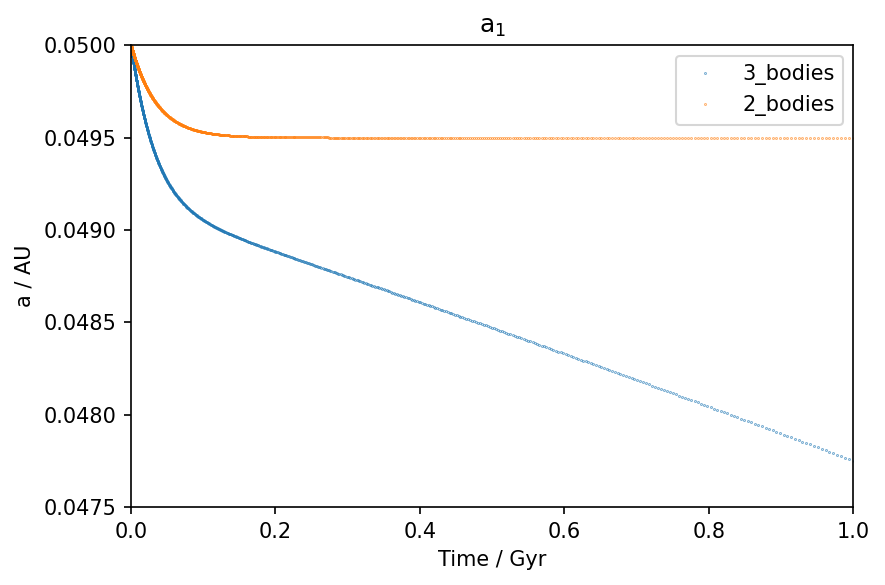

In [6]:
plt.figure(dpi=150)
plt.title("a$_1$")
plt.plot(df.t * 1e-9, df.a1, '.', ms=0.5,  label=name_file1)
plt.plot(df2.t * 1e-9, df2.a1, '.', ms=0.5,  label=name_file2)
plt.xlabel("Time / Gyr")
plt.ylabel("a / AU")
plt.xlim(0, 1)
plt.ylim(0.0475, 0.05)
plt.legend()
plt.tight_layout()
plt.show()

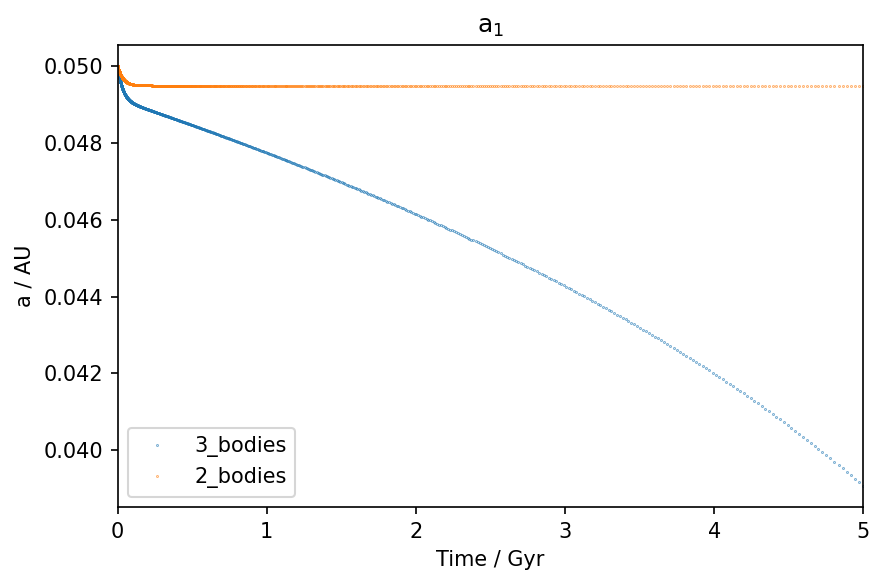

In [7]:
plt.figure(dpi=150)
plt.title("a$_1$")
plt.plot(df.t * 1e-9, df.a1, '.', ms=0.5,  label=name_file1)
plt.plot(df2.t * 1e-9, df2.a1, '.', ms=0.5,  label=name_file2)
plt.xlabel("Time / Gyr")
plt.ylabel("a / AU")
plt.xlim(0, 5)
plt.legend()
plt.tight_layout()
plt.show()

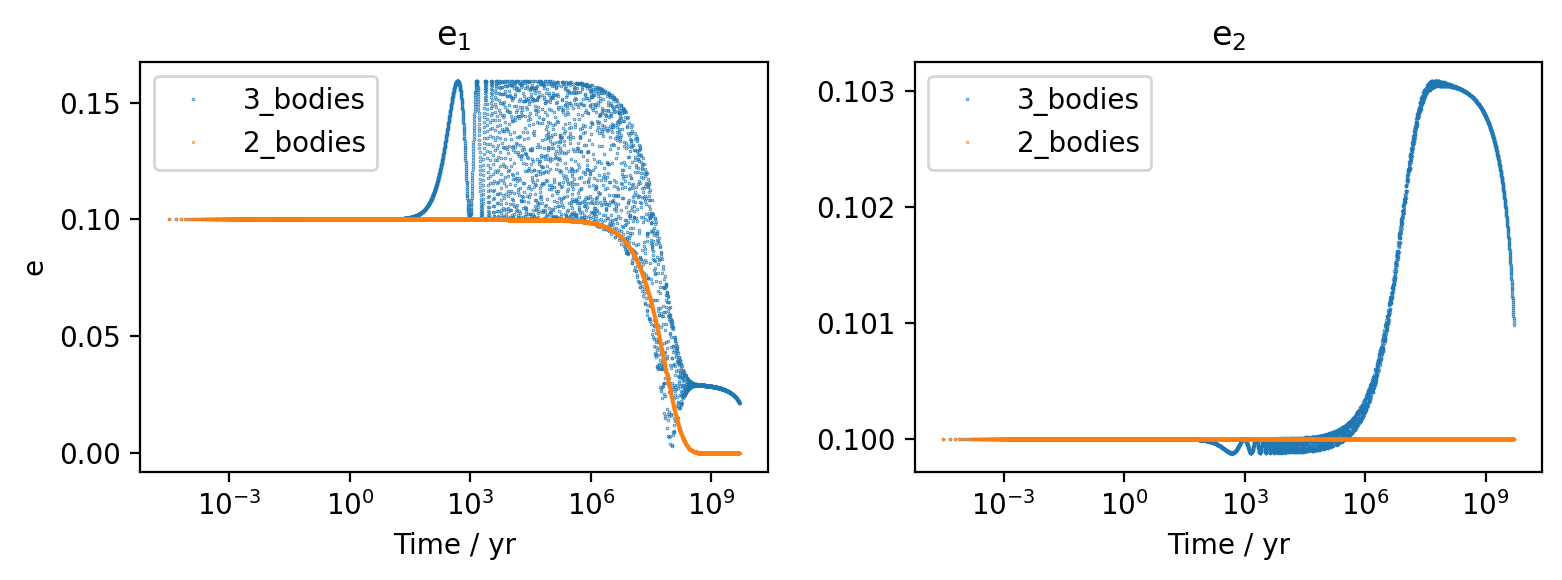

In [8]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("e$_1$")
plt.plot(df.t, df.e1, '.', ms=0.5,  label=name_file1)
plt.plot(df2.t, df2.e1, '.', ms=0.5,  label=name_file2)
plt.xlabel("Time / yr")
plt.ylabel("e")
plt.semilogx()
plt.legend()
plt.subplot(1,2,2)
plt.title("e$_2$")
plt.plot(df.t, df.e2, '.', ms=0.5,  label=name_file1)
plt.plot(df2.t, df2.e2, '.', ms=0.5,  label=name_file2)
plt.xlabel("Time / yr")
plt.semilogx()
plt.legend()
plt.tight_layout()
plt.show()

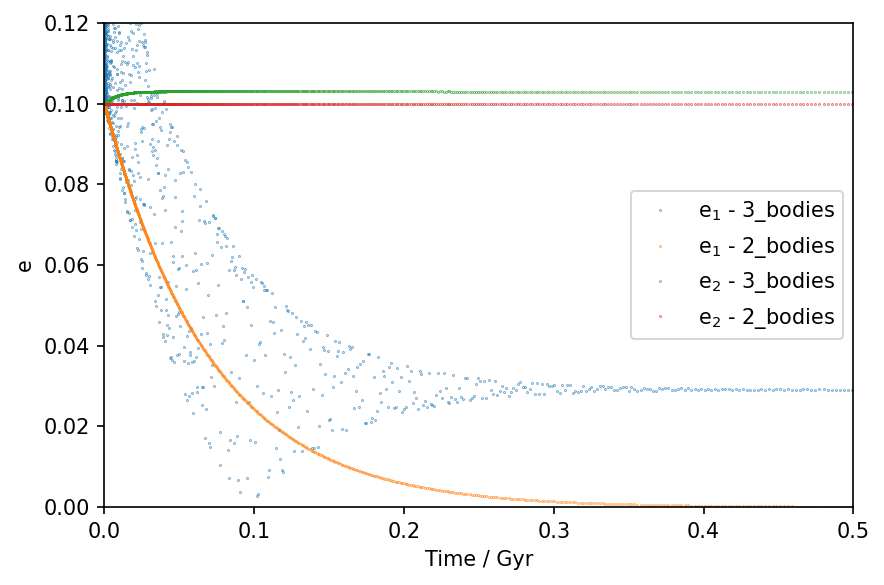

In [9]:
plt.figure(dpi=150)
plt.plot(df.t * 1e-9, df.e1, '.', ms=0.5, label="e$_1$ - " + name_file1)
plt.plot(df2.t * 1e-9, df2.e1, '.', ms=0.5, label="e$_1$ - " + name_file2)
plt.plot(df.t * 1e-9, df.e2, '.', ms=0.5, label="e$_2$ - " + name_file1)
plt.plot(df2.t * 1e-9, df2.e2, '.', ms=0.5, label="e$_2$ - " + name_file2)
plt.xlabel("Time / Gyr")
plt.ylabel("e")
plt.xlim(0, 0.5)
plt.ylim(0, 0.12)
plt.legend()
plt.tight_layout()
plt.show()

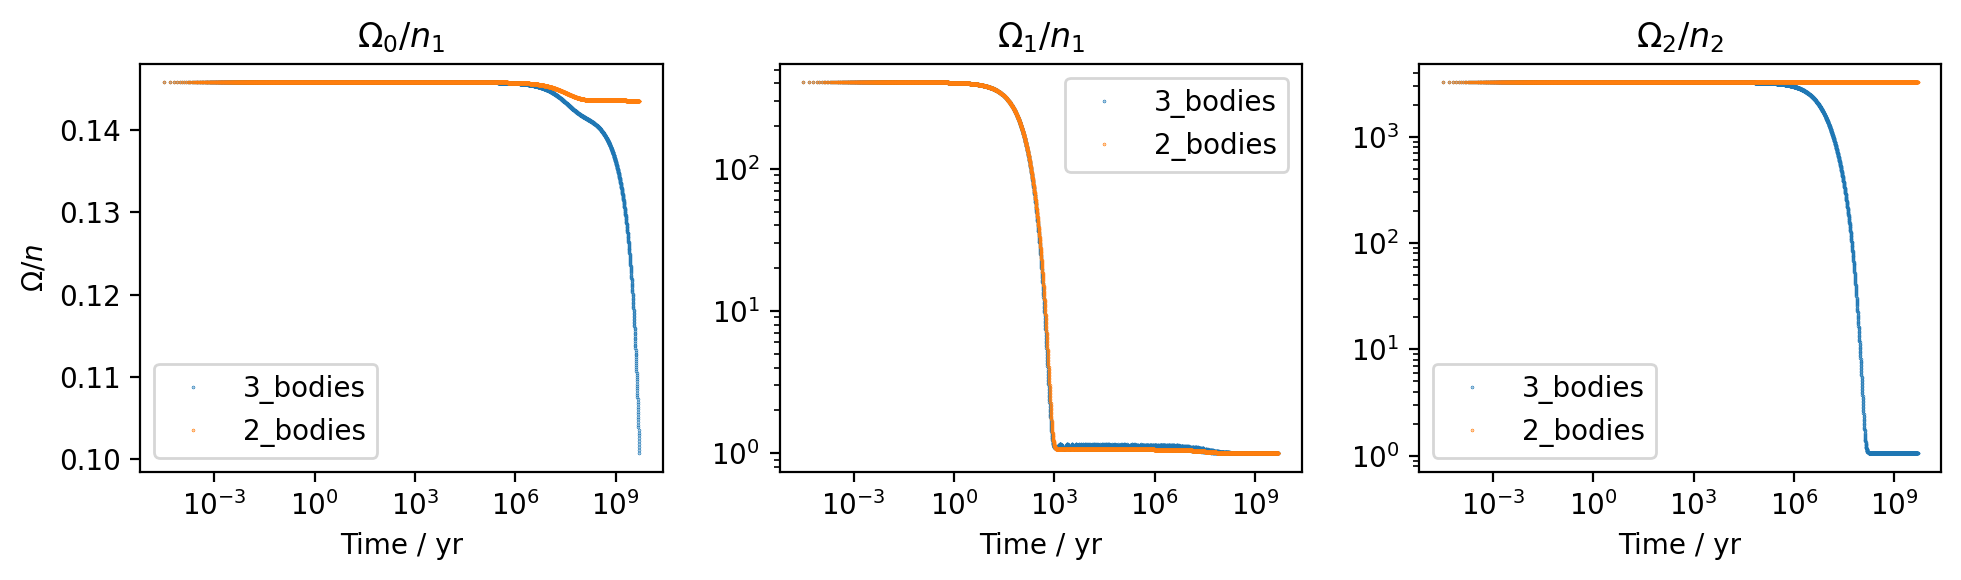

In [10]:
plt.figure(dpi=200, figsize=(10,3))
plt.subplot(1,3,1)
plt.title("$\Omega_0 / n_1$")
plt.plot(df.t, df.s0/df.n1, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.s0/df2.n1, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.ylabel("$\Omega / n$")
plt.semilogx()
plt.legend()
plt.subplot(1,3,2)
plt.title("$\Omega_1 / n_1$")
plt.plot(df.t, df.s1/df.n1, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.s1/df2.n1, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.subplot(1,3,3)
plt.title("$\Omega_2 / n_2$")
plt.plot(df.t, df.s2/df.n2, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.s2/df2.n2, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.show()

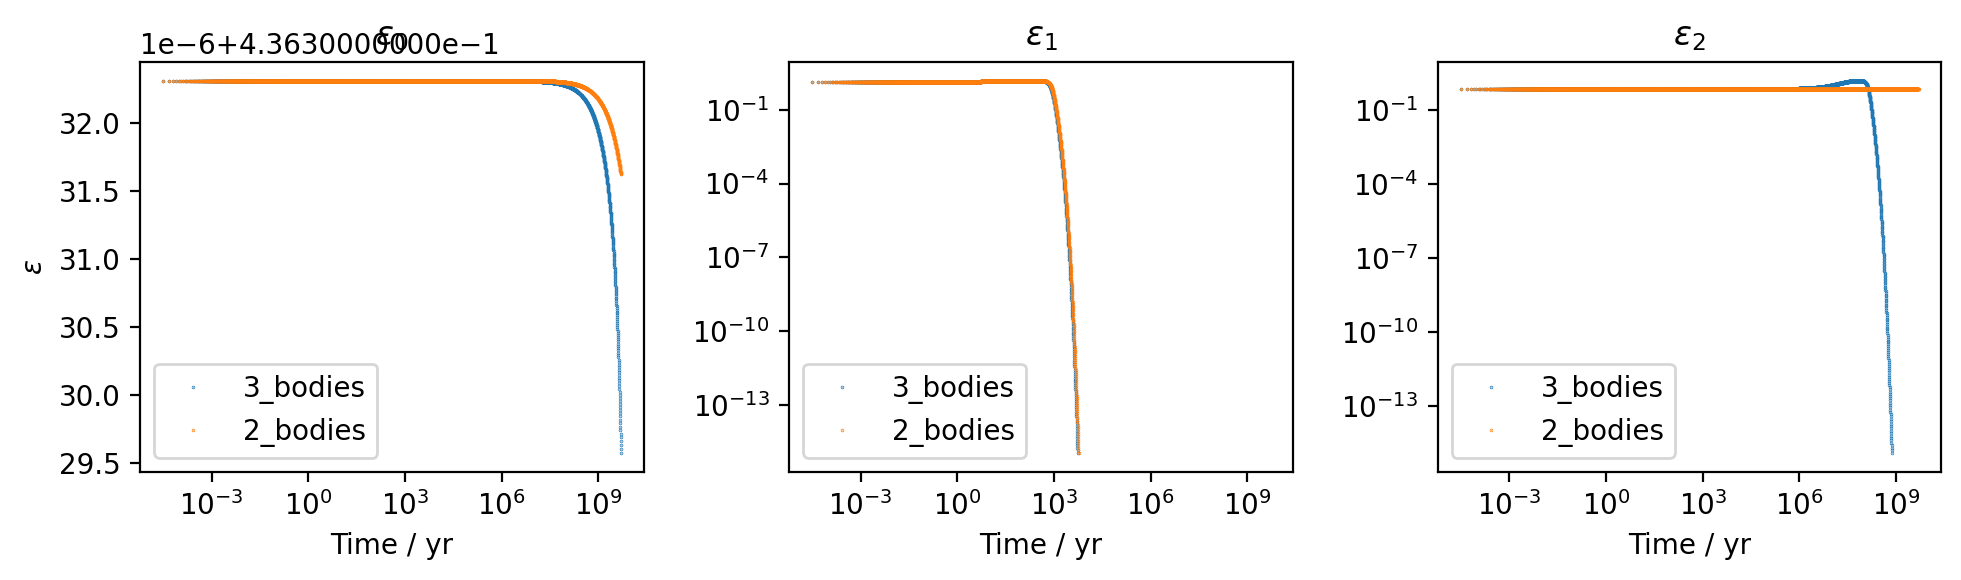

In [11]:
plt.figure(dpi=200, figsize=(10,3))
plt.subplot(1,3,1)
plt.title("$\epsilon_0$")
plt.plot(df.t, df.o0, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.o0, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.ylabel("$\epsilon$")
plt.semilogx()
plt.legend()
plt.subplot(1,3,2)
plt.title("$\epsilon_1$")
plt.plot(df.t, df.o1, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.o1, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.subplot(1,3,3)
plt.title("$\epsilon_2$")
plt.plot(df.t, df.o2, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.o2, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.show()

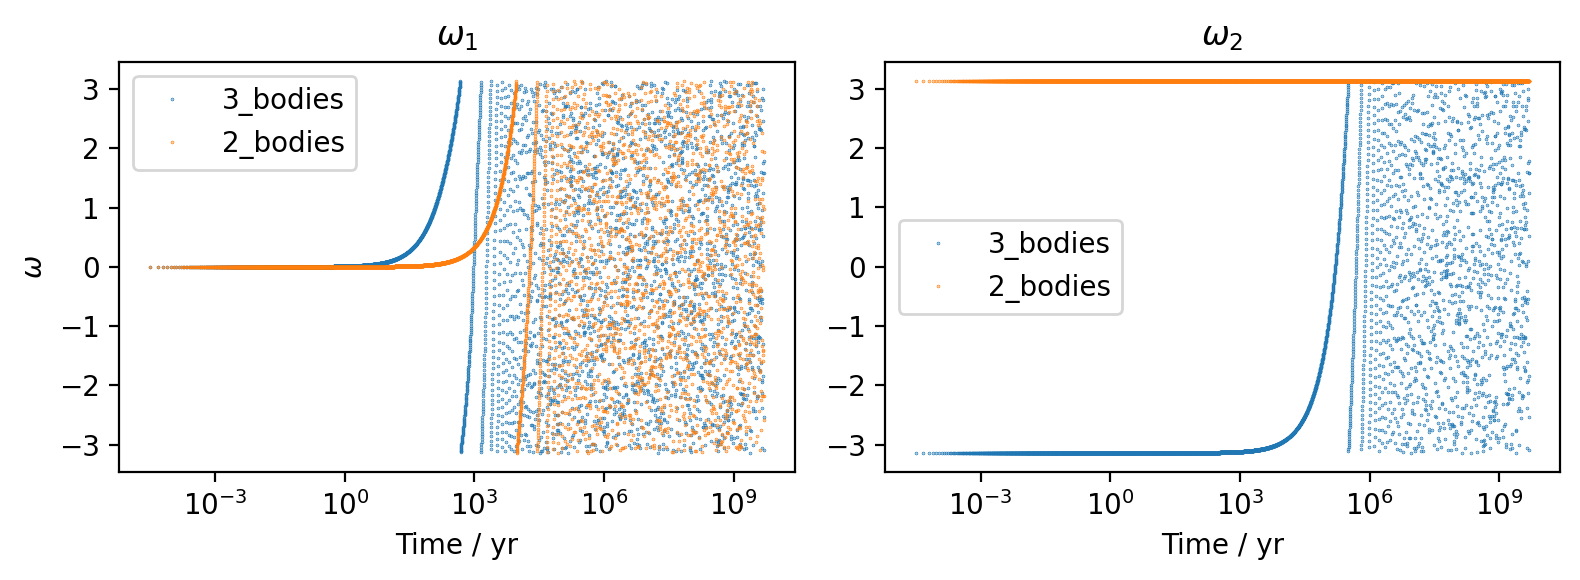

In [12]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("$\omega_1$")
plt.plot(df.t, df.w1, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.w1, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.ylabel("$\omega$")
plt.semilogx()
plt.legend()
plt.subplot(1,2,2)
plt.title("$\omega_2$")
plt.plot(df.t, df.w2, '.', ms=0.5, label=name_file1)
plt.plot(df2.t, df2.w2, '.', ms=0.5, label=name_file2)
plt.xlabel("Time / yr")
plt.semilogx()
plt.legend()
plt.tight_layout()
plt.show()

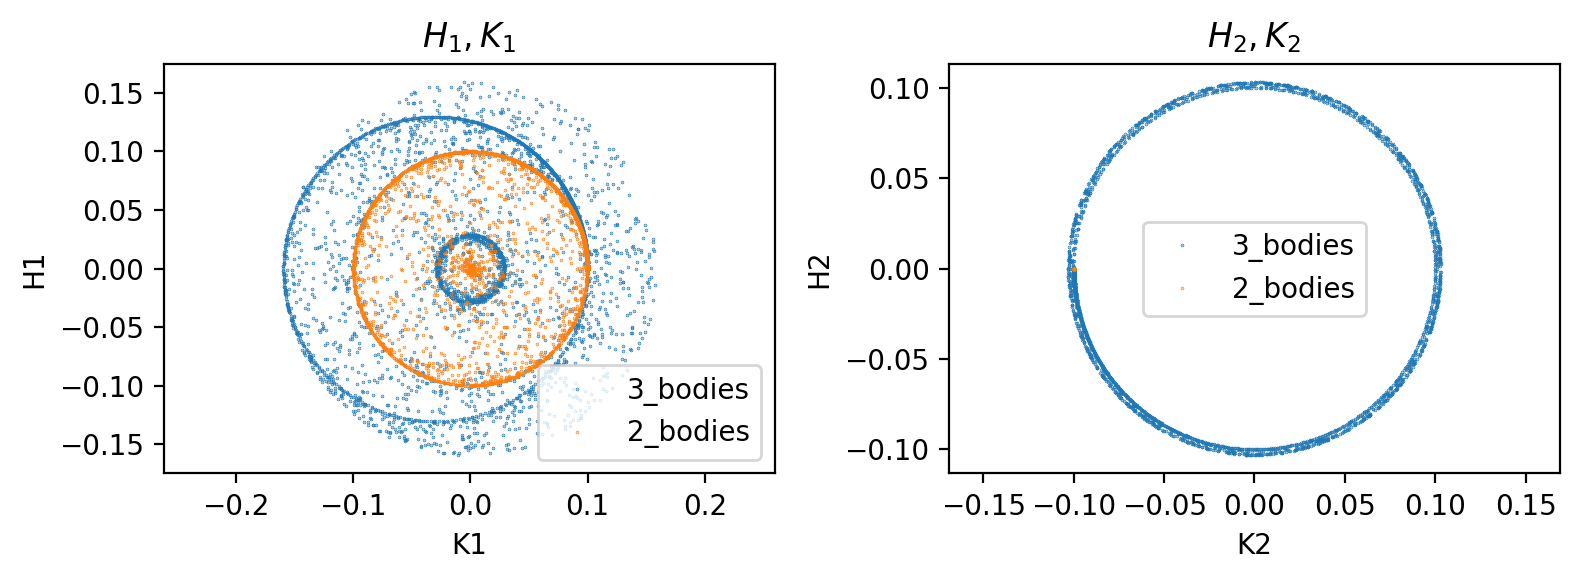

In [13]:
plt.figure(dpi=200, figsize=(8,3))
plt.subplot(1,2,1)
plt.title("$H_1,K_1$")
plt.plot(df.K1, df.H1, '.', ms=0.5, label=name_file1)
plt.plot(df2.K1, df2.H1, '.', ms=0.5, label=name_file2)
plt.xlabel("K1")
plt.ylabel("H1")
plt.axis("equal")
plt.legend()
plt.subplot(1,2,2)
plt.title("$H_2,K_2$")
plt.plot(df.K2, df.H2, '.', ms=0.5, label=name_file1)
plt.plot(df2.K2, df2.H2, '.', ms=0.5, label=name_file2)
plt.xlabel("K2")
plt.ylabel("H2")
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()